# Introduction

In this write up we show how to normalise the marks across multi-discipline selection examination.  Consider a case of a single advertisement for multiple profiles and the posts can have multiple reservation categories.  

The principle used here will be that or normalising the marks obtained by different exams on to a single score that can be used to compare candidates across disciplines.   It takes into account the difference in the ability of the candidates appearing for each of the exams and the difficulty level of the exams.

At the end of the normalisation, we can compare how a particular person has performed relative to the average person in that group.  Assume two groups X and Y, a normalised score will be a single score for all the persons irrespective of the group. This can be used to draw up a single merit list, which may be used for shortlisting and final selection.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## X- and Y-profile marks

There are two assessments taken separately for the two profiles (or groups) of candidates.  We can roughly categorise the difficulty of questions in the assessment as Very easy, easy, medium, difficult, very difficult.

Let us assume that X-profile assessment test was challenging and had questions that were of medium, difficult, and very difficulty levels.  The marks obtained by the candidates are therefore lower on average and also there is a wide spread of marks.

However, Y-profile assessment test was basic had easy and very easy questions that almost everyone could get. Therefore, the average marks was high and the spread was also narrow.

In the following we show a randomly generated marks between 0 and 100 for the two profiles X and Y.

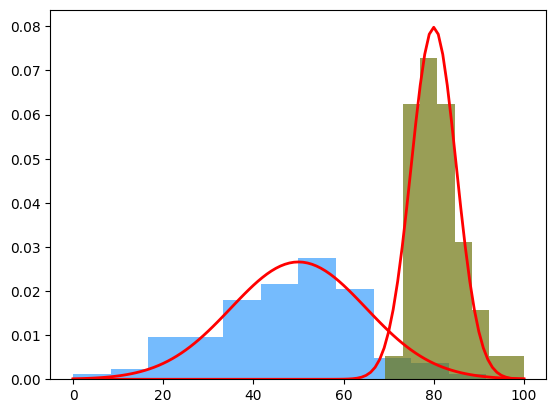

In [2]:
Nx = 100
mux = 50
sigx = 15

X = np.random.normal(mux,sigx,Nx)

plt.hist(X, bins="auto", density=True, range=[0,100], facecolor = 'xkcd:sky blue')



Ny = 50
muy = 80
sigy = 5

Y = np.random.normal(muy,sigy,Ny)

plt.hist(Y, bins="auto", density=True, range=[0,100], facecolor='xkcd:olive', alpha=0.7)

# Analytical desntity profile
bins = np.linspace(0,100,101)
plt.plot(bins, 1 / (sigx * np.sqrt(2 * np.pi)) * np.exp(-(bins - mux) ** 2 / (2 * sigx ** 2)), linewidth=2, color='r')
plt.plot(bins, 1 / (sigy * np.sqrt(2 * np.pi)) * np.exp(-(bins - muy) ** 2 / (2 * sigy ** 2)), linewidth=2, color='r')

plt.show()

Notice that the X-profile (blue) has an average mark around 50 and a wide distribution, whereas the Y-profile (olive) has a narrow distribution at a higher mark around the average of 80.

The red lines denote normal distribution curves with the same mean and standard deviation.

## Normalised Score

The first principle of normalisation will equate the average of X-profile to the average of Y-profile. So in the normalised score both will get the same Score, say 60. That is 50 marks of X-profile and 80 marks of Y-profile will get a score of 60.

Thee second principle is that any person who is above average in X-profile will be equated to the above-average person in Y-profile by measuring the distance away from the average using the standard deviations.  Meaning, a person who is one standard deviation (15 marks) above the average (50 marks) in X-profile, they will get the same normalised score as the person who is one-standard deviation (5 marks) above the average (80 marks) in the Y-profile.  This applies for all the scores, above and below the average.

In the normalised score we give arbitrary value of 60 to be the average and 10 to be the standard deviation.  This is so that three times standard deivation above the average is still less than 100. It is possible that in the process of normalisation some candidates may get a score more than 100, but this is very unlikely (with a probability 0.00006).

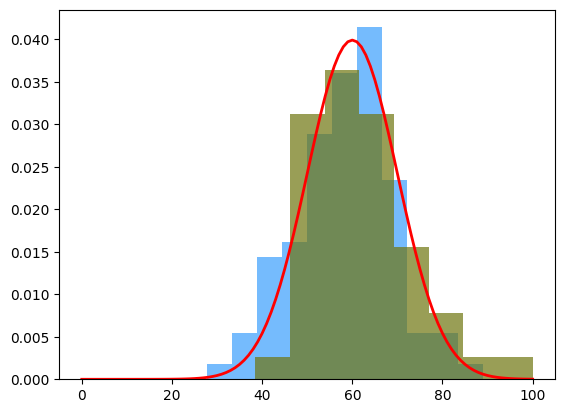

In [3]:
mu = 60
sigma = 10

Xnorm = mu + (X-mux)/sigx * sigma
Ynorm = mu + (Y-muy)/sigy * sigma

plt.hist(Xnorm, bins="auto", density=True, range=[0,100], facecolor='xkcd:sky blue')
plt.hist(Ynorm, bins="auto", density=True, range=[0,100], facecolor='xkcd:olive',alpha=0.7)

bins = np.linspace(0,100,101)
plt.plot(bins, 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu) ** 2 / (2 * sigma ** 2)), linewidth=2, color='r')
plt.show()

Notice that the when the two profile marks are normalised, they are mapped to the same mean and standard deviation.  The mean (60) and standard widths (10) are the same.  With this normalised score we can compare candidates across both profiles, irrespective of the difficulty level of the examination.

## Top Normalised Scores

Here are the top 10 raw marks and corresponding normalised score of the X-profile:

In [4]:
[(f'{i:.1f}',f'{j:.1f}') for i,j in zip(np.sort(X)[::-1][:10], np.sort(Xnorm)[::-1][:10])]

[('87.6', '85.1'),
 ('78.0', '78.7'),
 ('77.8', '78.6'),
 ('77.6', '78.4'),
 ('73.9', '75.9'),
 ('70.0', '73.3'),
 ('69.3', '72.9'),
 ('66.8', '71.2'),
 ('65.9', '70.6'),
 ('65.9', '70.6')]

And the top 10 raw marks and corresponding normalised score of the Y-profile:

In [5]:
[(f'{i:.1f}',f'{j:.1f}') for i,j in zip(np.sort(Y)[::-1][:10], np.sort(Ynorm)[::-1][:10])]

[('98.7', '97.4'),
 ('96.1', '92.2'),
 ('90.8', '81.6'),
 ('90.6', '81.1'),
 ('90.1', '80.1'),
 ('87.6', '75.1'),
 ('87.1', '74.3'),
 ('86.8', '73.6'),
 ('86.8', '73.6'),
 ('84.9', '69.9')]

Similarly, we can see the effect of normalisation on the bottom 10 performers in each of the profiles.

In [6]:
[(f'{i:.1f}',f'{j:.1f}') for i,j in zip(np.sort(X)[:10], np.sort(Xnorm)[:10])]

[('5.7', '30.5'),
 ('11.8', '34.5'),
 ('16.7', '37.8'),
 ('17.6', '38.4'),
 ('20.6', '40.4'),
 ('20.7', '40.5'),
 ('21.5', '41.0'),
 ('22.5', '41.7'),
 ('24.4', '42.9'),
 ('24.8', '43.2')]

In [7]:
[(f'{i:.1f}',f'{j:.1f}') for i,j in zip(np.sort(Y)[:10], np.sort(Ynorm)[:10])]

[('72.9', '45.9'),
 ('73.3', '46.7'),
 ('73.4', '46.8'),
 ('73.9', '47.9'),
 ('74.8', '49.5'),
 ('75.4', '50.7'),
 ('75.5', '51.1'),
 ('75.6', '51.2'),
 ('75.7', '51.5'),
 ('76.0', '51.9')]

## All normalised scores above 70 (one standard deviation above average)

Let us now find the number of candidates who have scored more than a given cut-off.  If we take the cut-off to be 70, that is one standard deviation above the mean (in this case 60 + 10), then we will get approximately top 15% of the persons, if the original marks were normally distributed.

In [8]:
import tabulate
Sx = len([i for i in Xnorm if i > 70])
Sy = len([i for i in Ynorm if i > 70])
data = [
         ["","Profile-X", "Profile-Y"],
         ["Appeared",Nx, Ny],
         ["Shortlisted",Sx,Sy],
         ["Fraction", f'{Sx/Nx:.2f}', Sy/Ny]
    ]
table = tabulate.tabulate(data, tablefmt='html')
table

,Profile-X,Profile-Y
Appeared,100,50
Shortlisted,12,9
Fraction,0.12,0.18


The fraction is approximately 15% +/- 4%. The fraction will be close to 15% only when the number of candidates is large.